#### Extract Order history data from amazon 
I used "Amazon Order History Reporter" extension for google chrome to get the order history reports for each year, in csv formats.

## Combine the csv files in to a single csv file called "Amazon orders.csv"

In [1]:
import pandas as pd
import numpy as np
import glob
import os

In [2]:
files = os.path.join("C:\\Users\\Fahad Engineering\\Desktop\\Data\\Data sets to work with\\Personal projects\\My amazon purchase history data","20*.csv")
files = glob.glob(files)

df = pd.concat(map(pd.read_csv, files), ignore_index = True)
df

,order id,items,to,date,total,shipping,shipping_refund,gift,VAT,refund,payments
0,D01-6604414-0069420,Anna Karenina;,0.0,2015-09-16,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
1,D01-3102227-6296604,NaN,0.0,2015-09-16,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
2,D01-7861047-2018241,The Einstein Theory of Relativity;,0.0,2015-09-16,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
3,D01-4626404-9803832,NaN,0.0,2015-09-16,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
4,D01-4641384-7183019,The Life of Buddha and Its Lessons;,0.0,2015-09-16,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
...,...,...,...,...,...,...,...,...,...,...,...
234,171-7566980-0542769,Manushyarariyan - മനുഷ്യരറിയാൻ;,Sanub Salim,2022-04-22,Rs.310.00,Rs. 50.00,0,0,0,0,UNKNOWN;
235,171-3180803-8020304,THOTTIYUDE MAKAN;,Sanub Salim,2022-04-22,Rs.129.00,Rs. 0.00,0,0,0,0,UNKNOWN;
236,171-1018932-0357130,KitschKitsch® 8pcs Baby Infant Child Proofing ...,Sanub Salim,2022-04-09,Rs.341.00,Rs. 0.00,0,0,0,0,UNKNOWN;
237,407-7324734-8605900,Motul C2 Chain Lube for All Bikes (150 ml);,Sanub Salim,2022-03-26,Rs.193.00,Rs. 0.00,0,0,0,0,UNKNOWN;


In [3]:
df.to_csv("C:\\Users\\Fahad Engineering\\Desktop\\Data\\Data sets to work with\\Personal projects\\My amazon purchase history data\\Amazon orders.csv")

#### Some changes were made using excel in the data set and saved a new CSV file

In [4]:
df = pd.read_csv("C:\\Users\\Fahad Engineering\\Desktop\\Data\\Data sets to work with\\Personal projects\\My amazon purchase history data\\My Amazon orders.csv")
df.head()

,Unnamed: 0,order id,items,to,date,total,shipping,shipping_refund,gift,VAT,refund,payments
0,0,D01-6604414-0069420,Anna Karenina;,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
1,1,D01-3102227-6296604,NaN,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
2,2,D01-7861047-2018241,The Einstein Theory of Relativity;,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
3,3,D01-4626404-9803832,NaN,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
4,4,D01-4641384-7183019,The Life of Buddha and Its Lessons;,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;


## Data Cleaning

#### Deal with NaN values

In [5]:
rows_with_NaN = df[df.isnull().any(axis=1)]
rows_with_NaN

,Unnamed: 0,order id,items,to,date,total,shipping,shipping_refund,gift,VAT,refund,payments
1,1,D01-3102227-6296604,NaN,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
3,3,D01-4626404-9803832,NaN,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
214,214,D01-3889488-7173430,NaN,0,19/03/2021,Rs.129.00,0,0,0,0,0,2021-03-19: Rs. 129.00;


#### We have found the above rows contains null values in the entire DataFrame
#### Now we will fill the NaN with 0.

In [6]:
df = df.fillna(0)

In [7]:
df.head(50)

,Unnamed: 0,order id,items,to,date,total,shipping,shipping_refund,gift,VAT,refund,payments
0,0,D01-6604414-0069420,Anna Karenina;,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
1,1,D01-3102227-6296604,0,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
2,2,D01-7861047-2018241,The Einstein Theory of Relativity;,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
3,3,D01-4626404-9803832,0,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
4,4,D01-4641384-7183019,The Life of Buddha and Its Lessons;,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
5,5,D01-8253957-5170208,101 Amazing Facts;,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
6,6,D01-9354940-7551052,The Three Musketeers;,0,16/09/2015,Rs.0.00,0,0,0,0,0,2015-09-16: Rs. 0.00;
7,7,408-1414244-7871566,Samsung On5 Pro (Gold);,Jibin Boban,15/11/2016,"Rs.7,990.00",Rs. 0.00,0,0,0,0,UNKNOWN;
8,8,403-6577047-7610724,Rossmax GB102 Aneroid Blood Pressure Monitor;,Ashu S Saleem,05/11/2016,Rs.539.00,Rs. 0.00,0,0,0,0,UNKNOWN;
9,9,403-9078804-2155553,"Littmann Classic Iii Stethoscope, Black Tube, ...",Ashu S Saleem,28/10/2016,"Rs.6,945.00",Rs. 0.00,0,0,0,0,UNKNOWN;


In [8]:
df.dtypes

Unnamed: 0          int64
order id           object
items              object
to                 object
date               object
total              object
shipping           object
shipping_refund     int64
gift               object
VAT                 int64
refund             object
payments           object
dtype: object

"Total" in this dataset is given as an object. And they also include 'Rs.' characters.
In order to do any calculations using this column, we will have to get rid of 'Rs.' and convert it in to float.

In [9]:
df['total'] = df['total'].str.replace('Rs.','')

C:\Users\FAHADE~1\AppData\Local\Temp/ipykernel_7276/2077605840.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['total'] = df['total'].str.replace('Rs.','')


#### We have managed to remove the 'Rs.'
#### Now we will remove , in the amounts

In [10]:
df['total'] = df['total'].str.replace(',', '')

#### Now we convert the 'total' column in to float

In [11]:
df['total'] = df['total'].astype(float)

In [12]:
df.head(20)

,Unnamed: 0,order id,items,to,date,total,shipping,shipping_refund,gift,VAT,refund,payments
0,0,D01-6604414-0069420,Anna Karenina;,0,16/09/2015,0.0,0,0,0,0,0,2015-09-16: Rs. 0.00;
1,1,D01-3102227-6296604,0,0,16/09/2015,0.0,0,0,0,0,0,2015-09-16: Rs. 0.00;
2,2,D01-7861047-2018241,The Einstein Theory of Relativity;,0,16/09/2015,0.0,0,0,0,0,0,2015-09-16: Rs. 0.00;
3,3,D01-4626404-9803832,0,0,16/09/2015,0.0,0,0,0,0,0,2015-09-16: Rs. 0.00;
4,4,D01-4641384-7183019,The Life of Buddha and Its Lessons;,0,16/09/2015,0.0,0,0,0,0,0,2015-09-16: Rs. 0.00;
5,5,D01-8253957-5170208,101 Amazing Facts;,0,16/09/2015,0.0,0,0,0,0,0,2015-09-16: Rs. 0.00;
6,6,D01-9354940-7551052,The Three Musketeers;,0,16/09/2015,0.0,0,0,0,0,0,2015-09-16: Rs. 0.00;
7,7,408-1414244-7871566,Samsung On5 Pro (Gold);,Jibin Boban,15/11/2016,7990.0,Rs. 0.00,0,0,0,0,UNKNOWN;
8,8,403-6577047-7610724,Rossmax GB102 Aneroid Blood Pressure Monitor;,Ashu S Saleem,05/11/2016,539.0,Rs. 0.00,0,0,0,0,UNKNOWN;
9,9,403-9078804-2155553,"Littmann Classic Iii Stethoscope, Black Tube, ...",Ashu S Saleem,28/10/2016,6945.0,Rs. 0.00,0,0,0,0,UNKNOWN;


## Calculate the total amount spent on Amazon 

In [13]:
df['total'].sum()

326836.29000000004

## Calculating Average Spend on Amazon, Biggest Purchase, Etc.

In [14]:
average_spend = df['total'].mean()
display(f'My average spend on amazon for an order is Rs. {average_spend}')

'My average spend on amazon for an order is Rs. 1421.027347826087'

#### We will calculate the median as well to hide outliers.

In [15]:
median_spend = df['total'].median()
display(f'Median spend is Rs. {median_spend}')

'Median spend is Rs. 679.0'

Since my mean spend and median spend differs very much, we will check if I have had any expensive orders. 
Let's see what is my highest order and lowest order.

In [16]:
high_order = df['total'].max()
low_order = df['total'].min()

display(f'My highest order is of Rs. {high_order}')
display(f'My lowest order is of Rs. {low_order}')

'My highest order is of Rs. 39490.0'

'My lowest order is of Rs. 0.0'

I have purchased some e-books for free for my kindle which costed me Rs.0.00

## How much shipping charges I have paid?

#### Same like, total, we need to get rid of Rs. in shipping

In [21]:
#Here we replaced the Rs. with empty space and converted the dtype of shipping to float
df['shipping'] = df['shipping'].str.replace('Rs.','').astype(float)

AttributeError: Can only use .str accessor with string values!

In [22]:
df

,Unnamed: 0,order id,items,to,date,total,shipping,shipping_refund,gift,VAT,refund,payments
0,0,D01-6604414-0069420,Anna Karenina;,0,16/09/2015,0.0,0.0,0,0,0,0,2015-09-16: Rs. 0.00;
1,1,D01-3102227-6296604,0,0,16/09/2015,0.0,0.0,0,0,0,0,2015-09-16: Rs. 0.00;
2,2,D01-7861047-2018241,The Einstein Theory of Relativity;,0,16/09/2015,0.0,0.0,0,0,0,0,2015-09-16: Rs. 0.00;
3,3,D01-4626404-9803832,0,0,16/09/2015,0.0,0.0,0,0,0,0,2015-09-16: Rs. 0.00;
4,4,D01-4641384-7183019,The Life of Buddha and Its Lessons;,0,16/09/2015,0.0,0.0,0,0,0,0,2015-09-16: Rs. 0.00;
...,...,...,...,...,...,...,...,...,...,...,...,...
225,225,171-4759695-6590753,How to Win an Indian Election: What Political ...,Sanub Salim,22/04/2022,284.0,0.0,0,0,0,0,UNKNOWN;
226,226,171-7566980-0542769,Manushyarariyan - മനുഷ്യരറിയാൻ;,Sanub Salim,22/04/2022,310.0,50.0,0,0,0,0,UNKNOWN;
227,227,171-3180803-8020304,THOTTIYUDE MAKAN;,Sanub Salim,22/04/2022,129.0,0.0,0,0,0,0,UNKNOWN;
228,228,171-1018932-0357130,KitschKitsch® 8pcs Baby Infant Child Proofing ...,Sanub Salim,09/04/2022,341.0,0.0,0,0,0,0,UNKNOWN;


In [26]:
display(f"I have paid Rs.{df['shipping'].sum()} in shipping so far.")

'I have paid Rs.4644.09 in shipping so far.'

## Analysing amazon spending over time

### For that we will convert the format of date column to date_time.

In [28]:
df['date'] = pd.to_datetime(df['date'])

In [34]:
df

,Unnamed: 0,order id,items,to,date,total,shipping,shipping_refund,gift,VAT,refund,payments
0,0,D01-6604414-0069420,Anna Karenina;,0,2015-09-16,0.0,0.0,0,0,0,0,2015-09-16: Rs. 0.00;
1,1,D01-3102227-6296604,0,0,2015-09-16,0.0,0.0,0,0,0,0,2015-09-16: Rs. 0.00;
2,2,D01-7861047-2018241,The Einstein Theory of Relativity;,0,2015-09-16,0.0,0.0,0,0,0,0,2015-09-16: Rs. 0.00;
3,3,D01-4626404-9803832,0,0,2015-09-16,0.0,0.0,0,0,0,0,2015-09-16: Rs. 0.00;
4,4,D01-4641384-7183019,The Life of Buddha and Its Lessons;,0,2015-09-16,0.0,0.0,0,0,0,0,2015-09-16: Rs. 0.00;
...,...,...,...,...,...,...,...,...,...,...,...,...
225,225,171-4759695-6590753,How to Win an Indian Election: What Political ...,Sanub Salim,2022-04-22,284.0,0.0,0,0,0,0,UNKNOWN;
226,226,171-7566980-0542769,Manushyarariyan - മനുഷ്യരറിയാൻ;,Sanub Salim,2022-04-22,310.0,50.0,0,0,0,0,UNKNOWN;
227,227,171-3180803-8020304,THOTTIYUDE MAKAN;,Sanub Salim,2022-04-22,129.0,0.0,0,0,0,0,UNKNOWN;
228,228,171-1018932-0357130,KitschKitsch® 8pcs Baby Infant Child Proofing ...,Sanub Salim,2022-09-04,341.0,0.0,0,0,0,0,UNKNOWN;


#### We will look at how much was spent on each day using a visualisation

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

We will grouby the order 'date' column for a better visualisation

In [45]:
daily_orders = df.groupby('date').sum()['total']
daily_orders.tail(10)

date
2021-10-16    39490.00
2021-10-31      239.00
2021-12-10     2809.00
2022-02-18      567.00
2022-03-18      372.93
2022-03-26      193.00
2022-04-22      723.00
2022-04-27     3677.00
2022-09-04      341.00
2022-10-02     1899.00
Name: total, dtype: float64

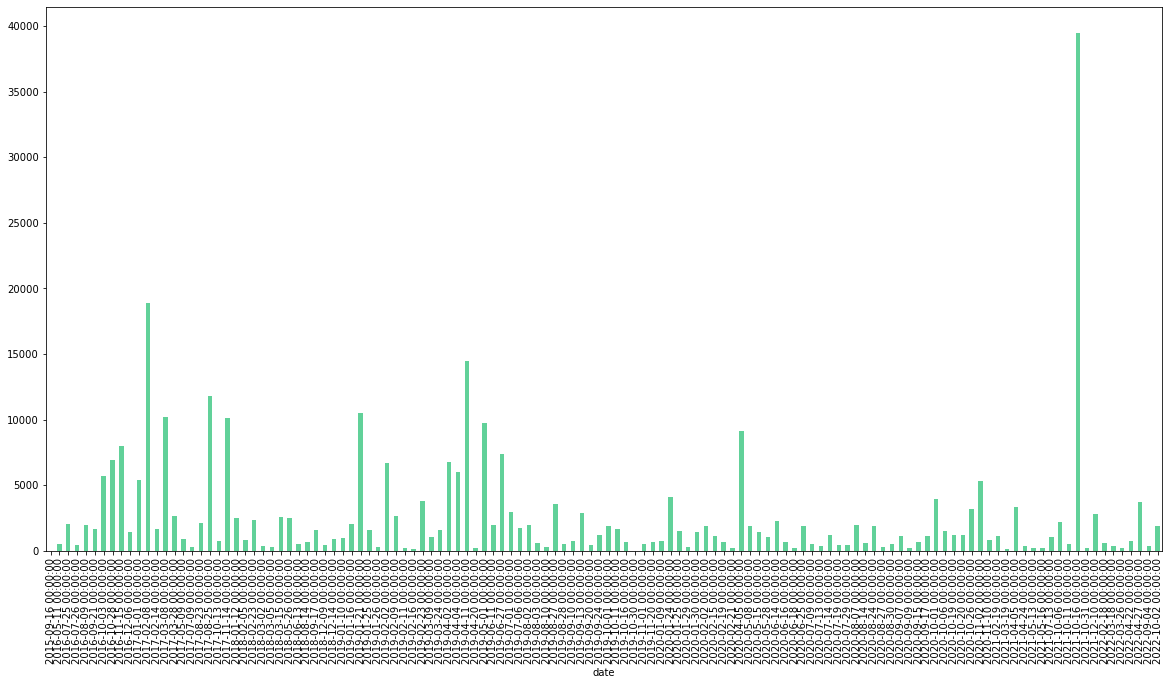

In [52]:
daily_orders.plot.bar(figsize=(20,10), color='#61D199');

What we have learned so far from this dataset?

How much I spent on Amazon during the period.
What my highest, lowest, and average order totals were.
How much shipping charges I paid.
On which days I spent the most money